In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ratings.csv")

In [ ]:
if df is not None:
    # contar cuantos registros hay
    print(f"Number of records: {len(df)}")

    # cantidad de usuarios id sin repetidos
    unique_users = df["userId"].nunique()
    print(f"Number of unique users: {unique_users}")

    # cantidad de peliculas id sin repetidos
    unique_movies = df["movieId"].nunique()
    print(f"Number of unique movies: {unique_movies}")


# extraer las 100 primeras filas
if df is not None:
    first_100_rows = df.head(100)
    print("First 100 rows of the DataFrame:")
    print(first_100_rows)
    # guardar las 100 primeras filas en un nuevo csv
    # first_100_rows.to_csv("first_100_rows.csv", index=False)


# cuantas veces aparece cada usuario
if df is not None:
    user_counts = df["userId"].value_counts()
    print("User counts:")
    print(user_counts)
    # save user counts to a new CSV file
    # sorted by userId
    user_counts = user_counts.sort_index()
    # sortear by count
    user_counts = user_counts.sort_values(ascending=False)
    user_counts.to_csv("user_counts.csv", header=True)

Number of records: 20000263
Number of unique users: 138493
Number of unique movies: 26744
First 100 rows of the DataFrame:
    userId  movieId  rating   timestamp
0        1        2     3.5  1112486027
1        1       29     3.5  1112484676
2        1       32     3.5  1112484819
3        1       47     3.5  1112484727
4        1       50     3.5  1112484580
..     ...      ...     ...         ...
95       1     2947     3.5  1112485580
96       1     2959     4.0  1094785698
97       1     2968     4.0  1112485825
98       1     3000     3.5  1112484569
99       1     3030     3.0  1112484548

[100 rows x 4 columns]
User counts:
userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
3030        20
3034        20
36560       20
3046        20
127908      20
Name: count, Length: 138493, dtype: int64


In [ ]:
timestamp = pd.to_datetime(df["timestamp"], unit='s').dt.strftime('%d/%m/%Y')
timestamp = timestamp.sort_values(ascending=False)
print("Timestamps convertidos al formato dd/mm/aaaa:")
print(timestamp)

Timestamps convertidos al formato dd/mm/aaaa:
10982146    31/12/2014
19882907    31/12/2014
17183897    31/12/2014
19882903    31/12/2014
19882904    31/12/2014
               ...    
5795746     01/01/1997
5795745     01/01/1997
5795744     01/01/1997
5795743     01/01/1997
4309580     01/01/1997
Name: timestamp, Length: 20000263, dtype: object


In [ ]:
print("=== RATINGS ORDENADOS POR FRECUENCIA (más frecuentes primero) ===")
rate_by_frequency = df["rating"].value_counts().sort_values(ascending=False)
print(rate_by_frequency)

print("\n=== RATINGS ORDENADOS POR VALOR (de menor a mayor) ===")
rate_by_value_asc = df["rating"].value_counts().sort_index(ascending=True)
print(rate_by_value_asc)

=== RATINGS ORDENADOS POR FRECUENCIA (más frecuentes primero) ===
rating
4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: count, dtype: int64

=== RATINGS ORDENADOS POR VALOR (de menor a mayor) ===
rating
0.5     239125
1.0     680732
1.5     279252
2.0    1430997
2.5     883398
3.0    4291193
3.5    2200156
4.0    5561926
4.5    1534824
5.0    2898660
Name: count, dtype: int64
rating
0.5     239125
1.0     680732
1.5     279252
2.0    1430997
2.5     883398
3.0    4291193
3.5    2200156
4.0    5561926
4.5    1534824
5.0    2898660
Name: count, dtype: int64


: 

Estadísticas de películas vistas por usuario:
Usuario que más películas ha visto: 9254 películas
Usuario que menos películas ha visto: 20 películas
Promedio de películas por usuario: 144.41
Mediana de películas por usuario: 68.00
Moda de películas por usuario: 20 películas


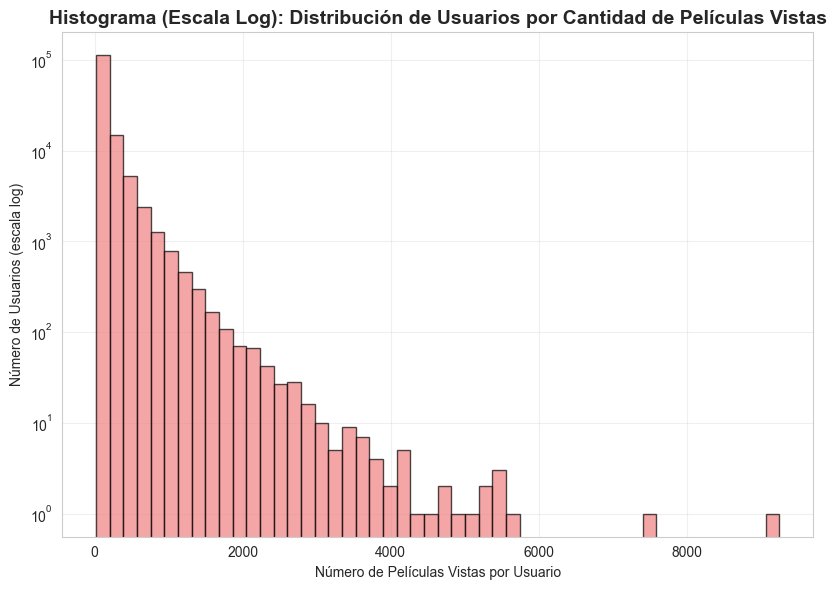

In [16]:
movies_per_user = df.groupby('userId')['movieId'].count()

print(f"Estadísticas de películas vistas por usuario:")
print(f"Usuario que más películas ha visto: {movies_per_user.max()} películas")
print(f"Usuario que menos películas ha visto: {movies_per_user.min()} películas")
print(f"Promedio de películas por usuario: {movies_per_user.mean():.2f}")
print(f"Mediana de películas por usuario: {movies_per_user.median():.2f}")
print(f"Moda de películas por usuario: {movies_per_user.mode().iloc[0]} películas")

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 2)
plt.hist(movies_per_user, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Histograma (Escala Log): Distribución de Usuarios por Cantidad de Películas Vistas', fontsize=14, fontweight='bold')
plt.xlabel('Número de Películas Vistas por Usuario')
plt.ylabel('Número de Usuarios (escala log)')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== ESTADÍSTICAS DE RATINGS ===
Media (Promedio): 3.53
Mediana: 3.50
Moda: 4.0
Total de ratings: 20,000,263
Mediana: 3.50
Moda: 4.0
Total de ratings: 20,000,263
Ratings únicos: 10
Ratings únicos: 10


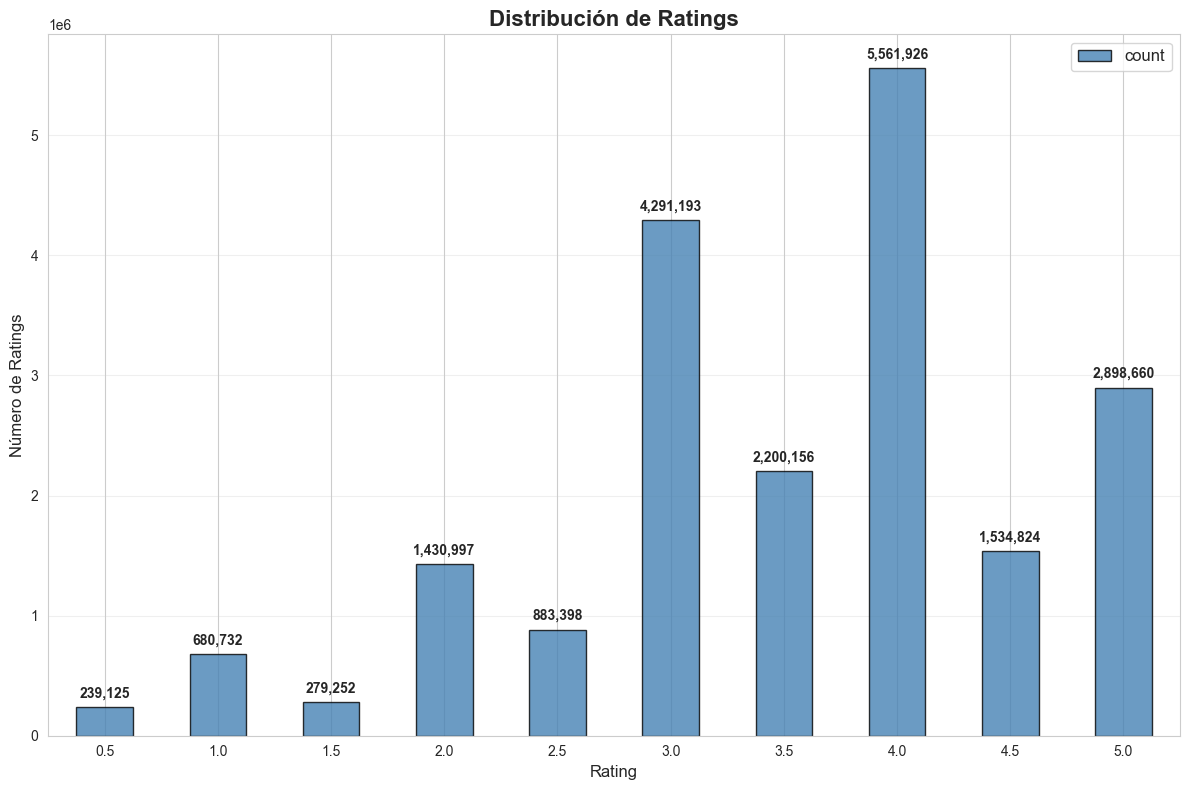

In [15]:
plt.figure(figsize=(14, 8))

ratings_distribution = df["rating"].value_counts().sort_index()

print("=== ESTADÍSTICAS DE RATINGS ===")
print(f"Media (Promedio): {df['rating'].mean():.2f}")
print(f"Mediana: {df['rating'].median():.2f}")
print(f"Moda: {df['rating'].mode().iloc[0]:.1f}")
print(f"Total de ratings: {len(df):,}")
print(f"Ratings únicos: {df['rating'].nunique()}")

ax = ratings_distribution.plot(kind='bar', color='steelblue', alpha=0.8, edgecolor='black', figsize=(12, 8))
plt.title('Distribución de Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Número de Ratings', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0)

for i, v in enumerate(ratings_distribution.values):
    plt.text(i, v + max(ratings_distribution.values) * 0.01, f'{v:,}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

rating_values = sorted(df["rating"].unique())

plt.legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()